# Flux of Mn across boundaries

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt
from datetime import date
import seaborn as sns; sns.set()
import pandas as pd
import os

%matplotlib notebook

###### Parameters:

In [5]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax-imin
jsize = jmax-jmin

# model result set:
results_folder = '/data/brogalla/run_storage/Mn-set4-202004/'

colors = ['#ccb598', '#448d90', '#739f78', '#CC8741', '#cee7fd', '#b9c1c7']

In [6]:
years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015] 
#2016,2017, 2018, 2019

###### Load files:

In [7]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

mesh      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12-EXH006_y2015m01d05_gridT.nc')
lons      = np.array(mesh.variables['nav_lon'])
lats      = np.array(mesh.variables['nav_lat'])

##### Functions:

In [8]:
def time_series_pickle(year, no_sed=False):
    folder = '/ocean/brogalla/GEOTRACES/time-series/'
    
    # Load calculated time series of fluxes:
    if no_sed:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder+'nosed-202005/'+'time-series-nosed'+str(year)+'.pickle','rb'))  
    else:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
                pickle.load(open(folder+'Mn-set4-202004/'+'time-series-ref'+str(year)+'.pickle','rb'))
    
#     # Conservation of volume check:
#     sum_V = -1*np.sum(time_series_V1,axis=2) - np.sum(time_series_V2,axis=2) - np.sum(time_series_V7,axis=2) - \
#            (np.sum(time_series_V3,axis=2) + np.sum(time_series_V4,axis=2) + np.sum(time_series_V5,axis=2) + \
#             np.sum(time_series_V6,axis=2)) + np.sum(time_series_V8,axis=2) + np.sum(time_series_V9,axis=2)
# #     print('Total volume change at end of time period: ', np.sum(sum_V))

    # Into Parry Channel:   time_series_mn2    
    # Out of Parry Channel: time_series_mn11
    
    return time_series_mn2, time_series_mn11

In [9]:
def file_dates(year):
    #start_date and end_date are datetime objects
    start_date = dt.datetime(year,1,1)
    end_date   = dt.datetime(year,12,31)
    
    file_list1 = np.sort(os.listdir(results_folder+'ref-'+str(year)+'/'))
    file_list2 = np.sort(os.listdir('/data/brogalla/ANHA12/'))
    
    Vlist = [i[26:31]=='gridV' for i in file_list2]
    gridV_list = list(compress(file_list2, Vlist))
    dateV_list = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_list]
    gridV_file_list = list(compress(gridV_list, [V > start_date and V < end_date for V in dateV_list]))
    
    dates = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_file_list]
    
    return dates

#### Calculations:

In [10]:
ts_ref_2002_in, ts_ref_2002_out = time_series_pickle(2002); ts_ref_2003_in, ts_ref_2003_out = time_series_pickle(2003);
ts_ref_2004_in, ts_ref_2004_out = time_series_pickle(2004); ts_ref_2005_in, ts_ref_2005_out = time_series_pickle(2005);
ts_ref_2006_in, ts_ref_2006_out = time_series_pickle(2006); ts_ref_2007_in, ts_ref_2007_out = time_series_pickle(2007);
ts_ref_2008_in, ts_ref_2008_out = time_series_pickle(2008); ts_ref_2009_in, ts_ref_2009_out = time_series_pickle(2009);
ts_ref_2010_in, ts_ref_2010_out = time_series_pickle(2010); ts_ref_2011_in, ts_ref_2011_out = time_series_pickle(2011);
ts_ref_2012_in, ts_ref_2012_out = time_series_pickle(2012); ts_ref_2013_in, ts_ref_2013_out = time_series_pickle(2013);
ts_ref_2014_in, ts_ref_2014_out = time_series_pickle(2014); ts_ref_2015_in, ts_ref_2015_out = time_series_pickle(2015);
# ts_ref_2016_in, ts_ref_2016_out = time_series_pickle(2016); # ts_ref_2017_in, ts_ref_2017_out = time_series_pickle(2017);
# ts_ref_2018_in, ts_ref_2018_out = time_series_pickle(2018); # ts_ref_2019_in, ts_ref_2019_out = time_series_pickle(2019);

# Shape: (5 day file number, depth level, coordinate point)
ts_ref_in = np.vstack((ts_ref_2002_in, ts_ref_2003_in, ts_ref_2004_in, ts_ref_2005_in, ts_ref_2006_in, ts_ref_2007_in, ts_ref_2008_in, \
                  ts_ref_2009_in, ts_ref_2010_in, ts_ref_2011_in, ts_ref_2012_in, ts_ref_2013_in, ts_ref_2014_in, ts_ref_2015_in))#, \
#                   ts_ref_2016_in, ts_ref_2017_in, ts_ref_2018_in, ts_ref_2019_in))

ts_ref_out = np.vstack((ts_ref_2002_out, ts_ref_2003_out, ts_ref_2004_out, ts_ref_2005_out, ts_ref_2006_out, ts_ref_2007_out, ts_ref_2008_out, \
                  ts_ref_2009_out, ts_ref_2010_out, ts_ref_2011_out, ts_ref_2012_out, ts_ref_2013_out, ts_ref_2014_out, ts_ref_2015_out))#, \
#                   ts_ref_2016_out, ts_ref_2017_out, ts_ref_2018_out, ts_ref_2019_out))

In [11]:
# ts_nosed_2002_in, ts_nosed_2002_out = time_series_pickle(2002); ts_nosed_2003_in, ts_nosed_2003_out = time_series_pickle(2003);
# ts_nosed_2004_in, ts_nosed_2004_out = time_series_pickle(2004); ts_nosed_2005_in, ts_nosed_2005_out = time_series_pickle(2005);
# ts_nosed_2006_in, ts_nosed_2006_out = time_series_pickle(2006); ts_nosed_2007_in, ts_nosed_2007_out = time_series_pickle(2007);
# ts_nosed_2008_in, ts_nosed_2008_out = time_series_pickle(2008); ts_nosed_2009_in, ts_nosed_2009_out = time_series_pickle(2009);
# ts_nosed_2010_in, ts_nosed_2010_out = time_series_pickle(2010); ts_nosed_2011_in, ts_nosed_2011_out = time_series_pickle(2011);
# ts_nosed_2012_in, ts_nosed_2012_out = time_series_pickle(2012);  ts_nosed_2013_in, ts_nosed_2013_out = time_series_pickle(2013);
# ts_nosed_2014_in, ts_nosed_2014_out = time_series_pickle(2014); # ts_nosed_2015_in, ts_nosed_2015_out = time_series_pickle(2015);
# ts_nosed_2016_in, ts_nosed_2016_out = time_series_pickle(2016); # ts_nosed_2017_in, ts_nosed_2017_out = time_series_pickle(2017);
# ts_nosed_2018_in, ts_nosed_2018_out = time_series_pickle(2018); # ts_nosed_2019_in, ts_nosed_2019_out = time_series_pickle(2019);

# Shape: (5 day file number, depth level, coordinate point)
# ts_nosed_in = np.vstack((ts_nosed_2002_in, ts_nosed_2003_in, ts_nosed_2004_in, ts_nosed_2005_in, ts_nosed_2006_in, ts_nosed_2007_in, ts_nosed_2008_in, \
#                   ts_nosed_2009_in, ts_nosed_2010_in, ts_nosed_2011_in, ts_nosed_2012_in, ts_nosed_2013_in, ts_nosed_2014_in, ts_nosed_2015_in, \
#                   ts_nosed_2016_in, ts_nosed_2017_in, ts_nosed_2018_in, ts_nosed_2019_in))

# ts_nosed_out = np.vstack((ts_nosed_2002_out, ts_nosed_2003_out, ts_nosed_2004_out, ts_nosed_2005_out, ts_nosed_2006_out, ts_nosed_2007_out, ts_nosed_2008_out, \
#                   ts_nosed_2009_out, ts_nosed_2010_out, ts_nosed_2011_out, ts_nosed_2012_out, ts_nosed_2013_out, ts_nosed_2014_out, ts_nosed_2015_out, \
#                   ts_nosed_2016_out, ts_nosed_2017_out, ts_nosed_2018_out, ts_nosed_2019_out))

In [12]:
dates_2002 = file_dates(2002); dates_2003 = file_dates(2003); dates_2004 = file_dates(2004);
dates_2005 = file_dates(2005); dates_2006 = file_dates(2006); dates_2007 = file_dates(2007);
dates_2008 = file_dates(2008); dates_2009 = file_dates(2009); dates_2010 = file_dates(2010);
dates_2011 = file_dates(2011); dates_2012 = file_dates(2012); dates_2013 = file_dates(2013);
dates_2014 = file_dates(2014); dates_2015 = file_dates(2015); #dates_2016 = file_dates(2016);
# dates_2017 = file_dates(2017) ;dates_2018 = file_dates(2018); dates_2019 = file_dates(2019);

dates = np.array(dates_2002 + dates_2003 + dates_2004 + dates_2005 + dates_2006 + dates_2007 + dates_2008 + \
                 dates_2009 + dates_2010 + dates_2011 + dates_2012+ dates_2013 + dates_2014 + dates_2015)# + \
#                  dates_2016 + dates_2017 + dates_2018 + dates_2019)


In [16]:
Parry_ref_cumsumin  = np.cumsum(np.sum(-1*ts_ref_in, axis=(1,2)))
Parry_ref_cumsumout = np.cumsum(np.sum(-1*ts_ref_out, axis=(1,2)))

Parry_ref_in  = np.sum(-1*ts_ref_in, axis=(1,2))
Parry_ref_out = np.sum(-1*ts_ref_out, axis=(1,2))

Parry_ref_diff = Parry_ref_out - Parry_ref_in

### Figures

<IPython.core.display.Javascript object>


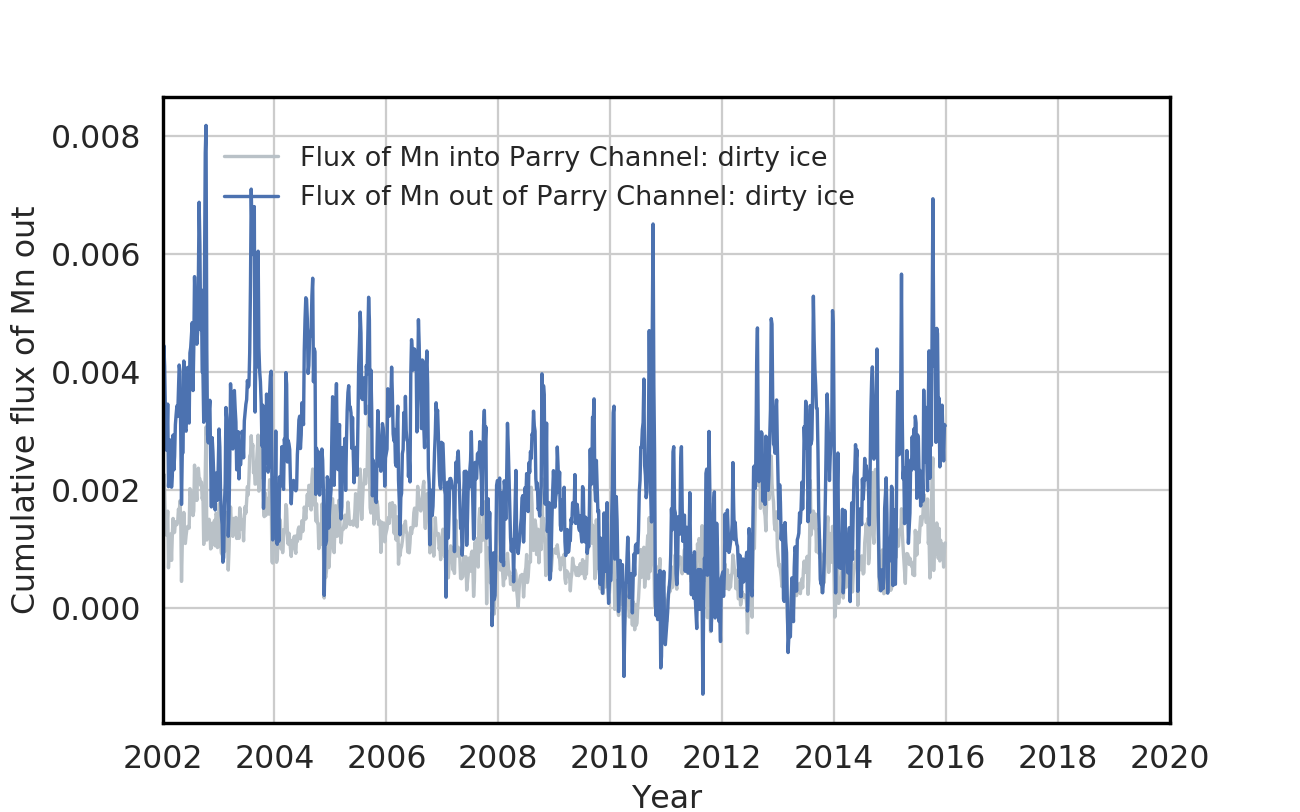

In [15]:
fig = plt.figure(figsize=(8,5))
st  = sns.axes_style("whitegrid")

with st:
    inpd = sns.lineplot(dates, Parry_ref_in, linewidth=1.5, color=colors[5], \
                        label=r'Flux of Mn into Parry Channel: dirty ice')
#     inpc = sns.lineplot(dates, Parry_nosed_in, linewidth=2.5, color=colors[5], marker="o", \
#                        markersize=7, label=r'Flux of Mn into Parry Channel: clean ice')
    outd = sns.lineplot(dates, Parry_ref_out, linewidth=1.5, \
                       label=r'Flux of Mn out of Parry Channel: dirty ice')
#     outc = sns.lineplot(dates, Parry_nosed_out, linewidth=2.5, marker='o', markersize=7, \
#                        label=r'Flux of Mn out of Parry Channel: clean ice')

    inpd.set_xlabel('Year', fontsize=14)
    inpd.set_ylabel('Cumulative flux of Mn out',fontsize=14)
    inpd.set(xlim=(dt.datetime(2002,1,1), dt.datetime(2020,1,1)))
    inpd.tick_params(axis='both', which='major', labelsize=14)
    inpd.spines['left'].set_linewidth(1.5);   inpd.spines['left'].set_color('black');
    inpd.spines['bottom'].set_linewidth(1.5); inpd.spines['bottom'].set_color('black');
    inpd.spines['right'].set_linewidth(1.5);  inpd.spines['right'].set_color('black');
    inpd.spines['top'].set_linewidth(1.5);    inpd.spines['top'].set_color('black');    

#     ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    inpd.legend(loc=(0.05, 0.8), frameon=False, fontsize=12)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/D1-annual-sea-ice-melt'+ \
#             str(date.today().strftime('%Y%m%d')) + '.png', bbox_inches='tight',dpi=300)

<IPython.core.display.Javascript object>


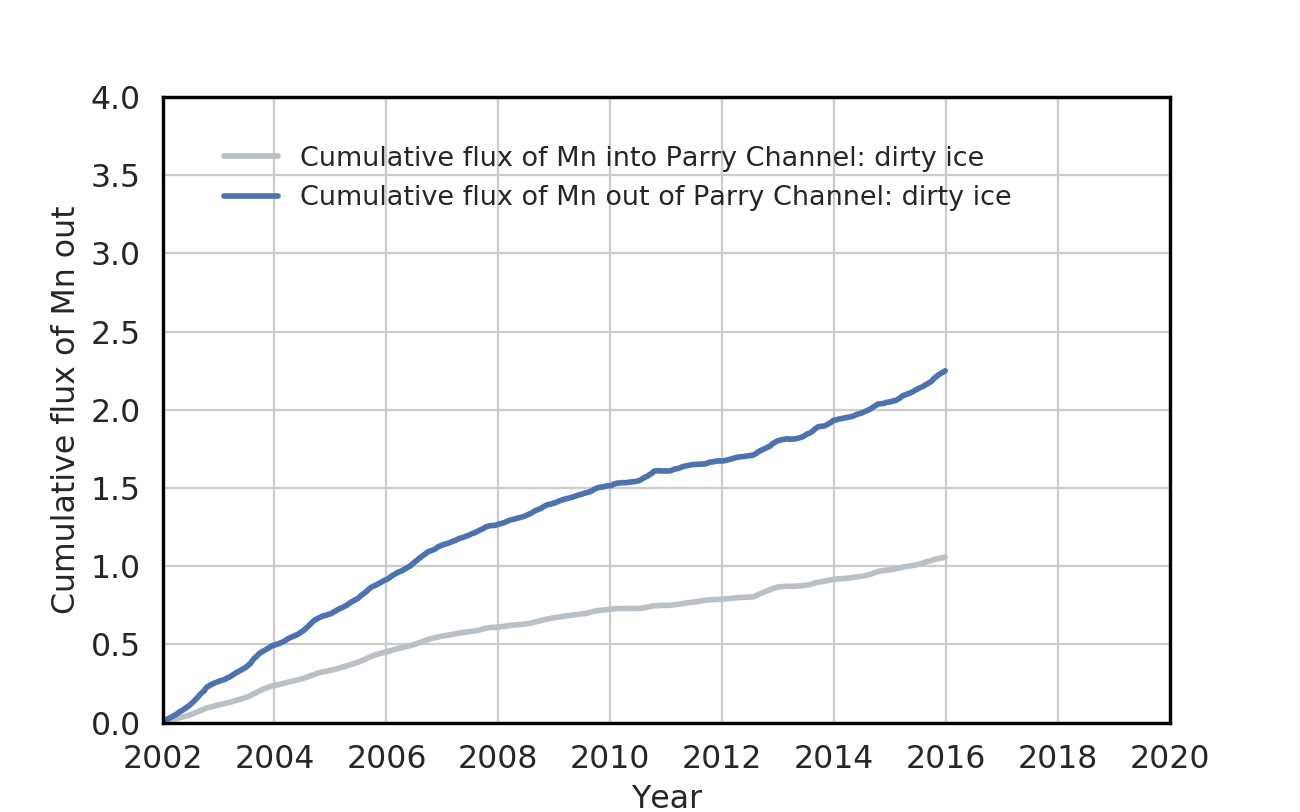

In [19]:
fig = plt.figure(figsize=(8,5))
st  = sns.axes_style("whitegrid")

with st:
    inpd = sns.lineplot(dates, Parry_ref_cumsumin, linewidth=2.5, color=colors[5], \
                        label=r'Cumulative flux of Mn into Parry Channel: dirty ice')
#     inpc = sns.lineplot(dates, Parry_nosed_in, linewidth=2.5, color=colors[5], marker="o", \
#                        markersize=7, label=r'Flux of Mn into Parry Channel: clean ice')
    outd = sns.lineplot(dates, Parry_ref_cumsumout, linewidth=2.5, \
                       label=r'Cumulative flux of Mn out of Parry Channel: dirty ice')
#     outc = sns.lineplot(dates, Parry_nosed_out, linewidth=2.5, marker='o', markersize=7, \
#                        label=r'Flux of Mn out of Parry Channel: clean ice')

    inpd.set_xlabel('Year', fontsize=14)
    inpd.set_ylabel('Cumulative flux of Mn out',fontsize=14)
    inpd.set(xlim=(dt.datetime(2002,1,1), dt.datetime(2020,1,1)), ylim=(0, 4.0))
    inpd.tick_params(axis='both', which='major', labelsize=14)
    inpd.spines['left'].set_linewidth(1.5);   inpd.spines['left'].set_color('black');
    inpd.spines['bottom'].set_linewidth(1.5); inpd.spines['bottom'].set_color('black');
    inpd.spines['right'].set_linewidth(1.5);  inpd.spines['right'].set_color('black');
    inpd.spines['top'].set_linewidth(1.5);    inpd.spines['top'].set_color('black');    

#     ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    inpd.legend(loc=(0.05, 0.8), frameon=False, fontsize=12)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/D1-annual-sea-ice-melt'+ \
#             str(date.today().strftime('%Y%m%d')) + '.png', bbox_inches='tight',dpi=300)

<IPython.core.display.Javascript object>


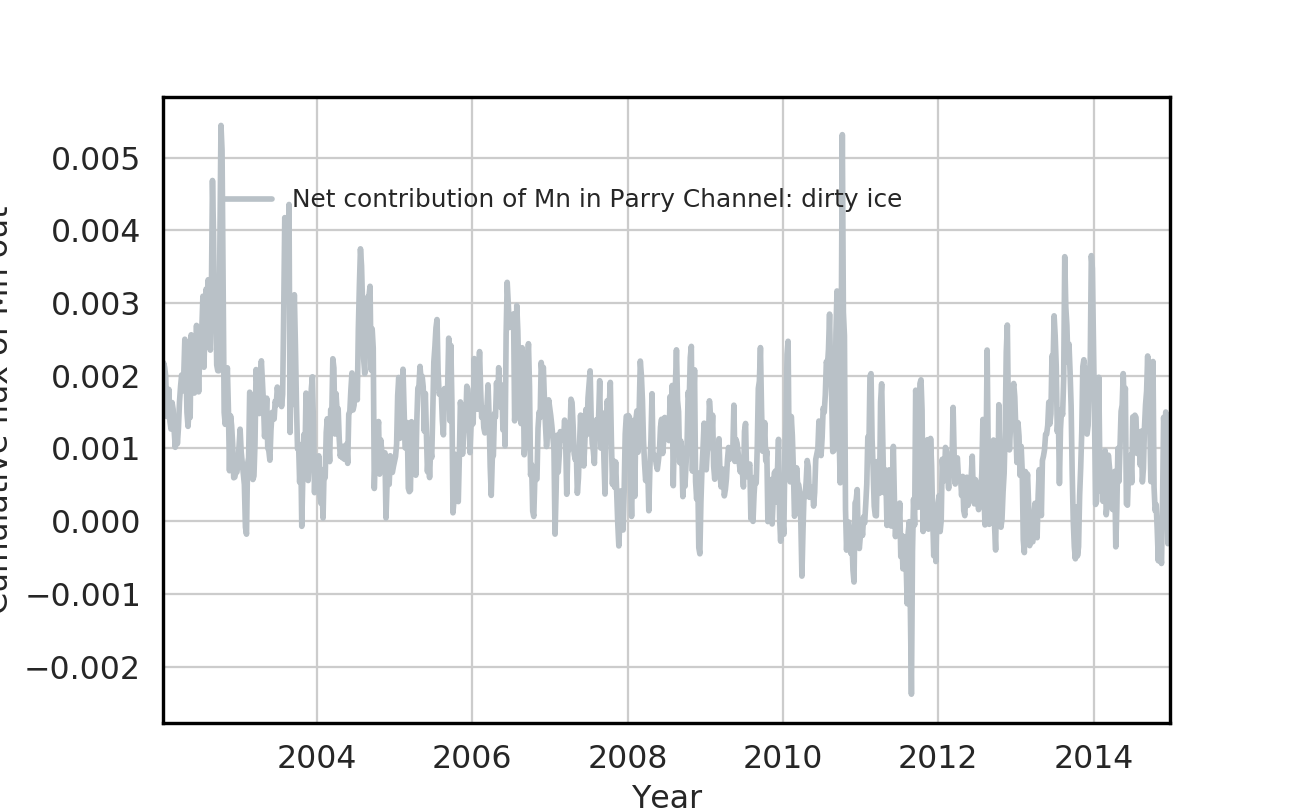

In [22]:
fig = plt.figure(figsize=(8,5))
st  = sns.axes_style("whitegrid")

with st:
    inpd = sns.lineplot(dates, Parry_ref_diff, linewidth=2.5, color=colors[5], \
                        label=r'Net contribution of Mn in Parry Channel: dirty ice')
#     inpc = sns.lineplot(dates, Parry_nosed_in, linewidth=2.5, color=colors[5], marker="o", \
#                        markersize=7, label=r'Flux of Mn into Parry Channel: clean ice')

    inpd.set_xlabel('Year', fontsize=14)
    inpd.set_ylabel('Cumulative flux of Mn out',fontsize=14)
    inpd.set(xlim=(dates[0], dates[-1]))
    inpd.tick_params(axis='both', which='major', labelsize=14)
    inpd.spines['left'].set_linewidth(1.5);   inpd.spines['left'].set_color('black');
    inpd.spines['bottom'].set_linewidth(1.5); inpd.spines['bottom'].set_color('black');
    inpd.spines['right'].set_linewidth(1.5);  inpd.spines['right'].set_color('black');
    inpd.spines['top'].set_linewidth(1.5);    inpd.spines['top'].set_color('black');    

#     ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    inpd.legend(loc=(0.05, 0.8), frameon=False)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/D1-annual-sea-ice-melt.png', bbox_inches='tight',dpi=300)

<IPython.core.display.Javascript object>


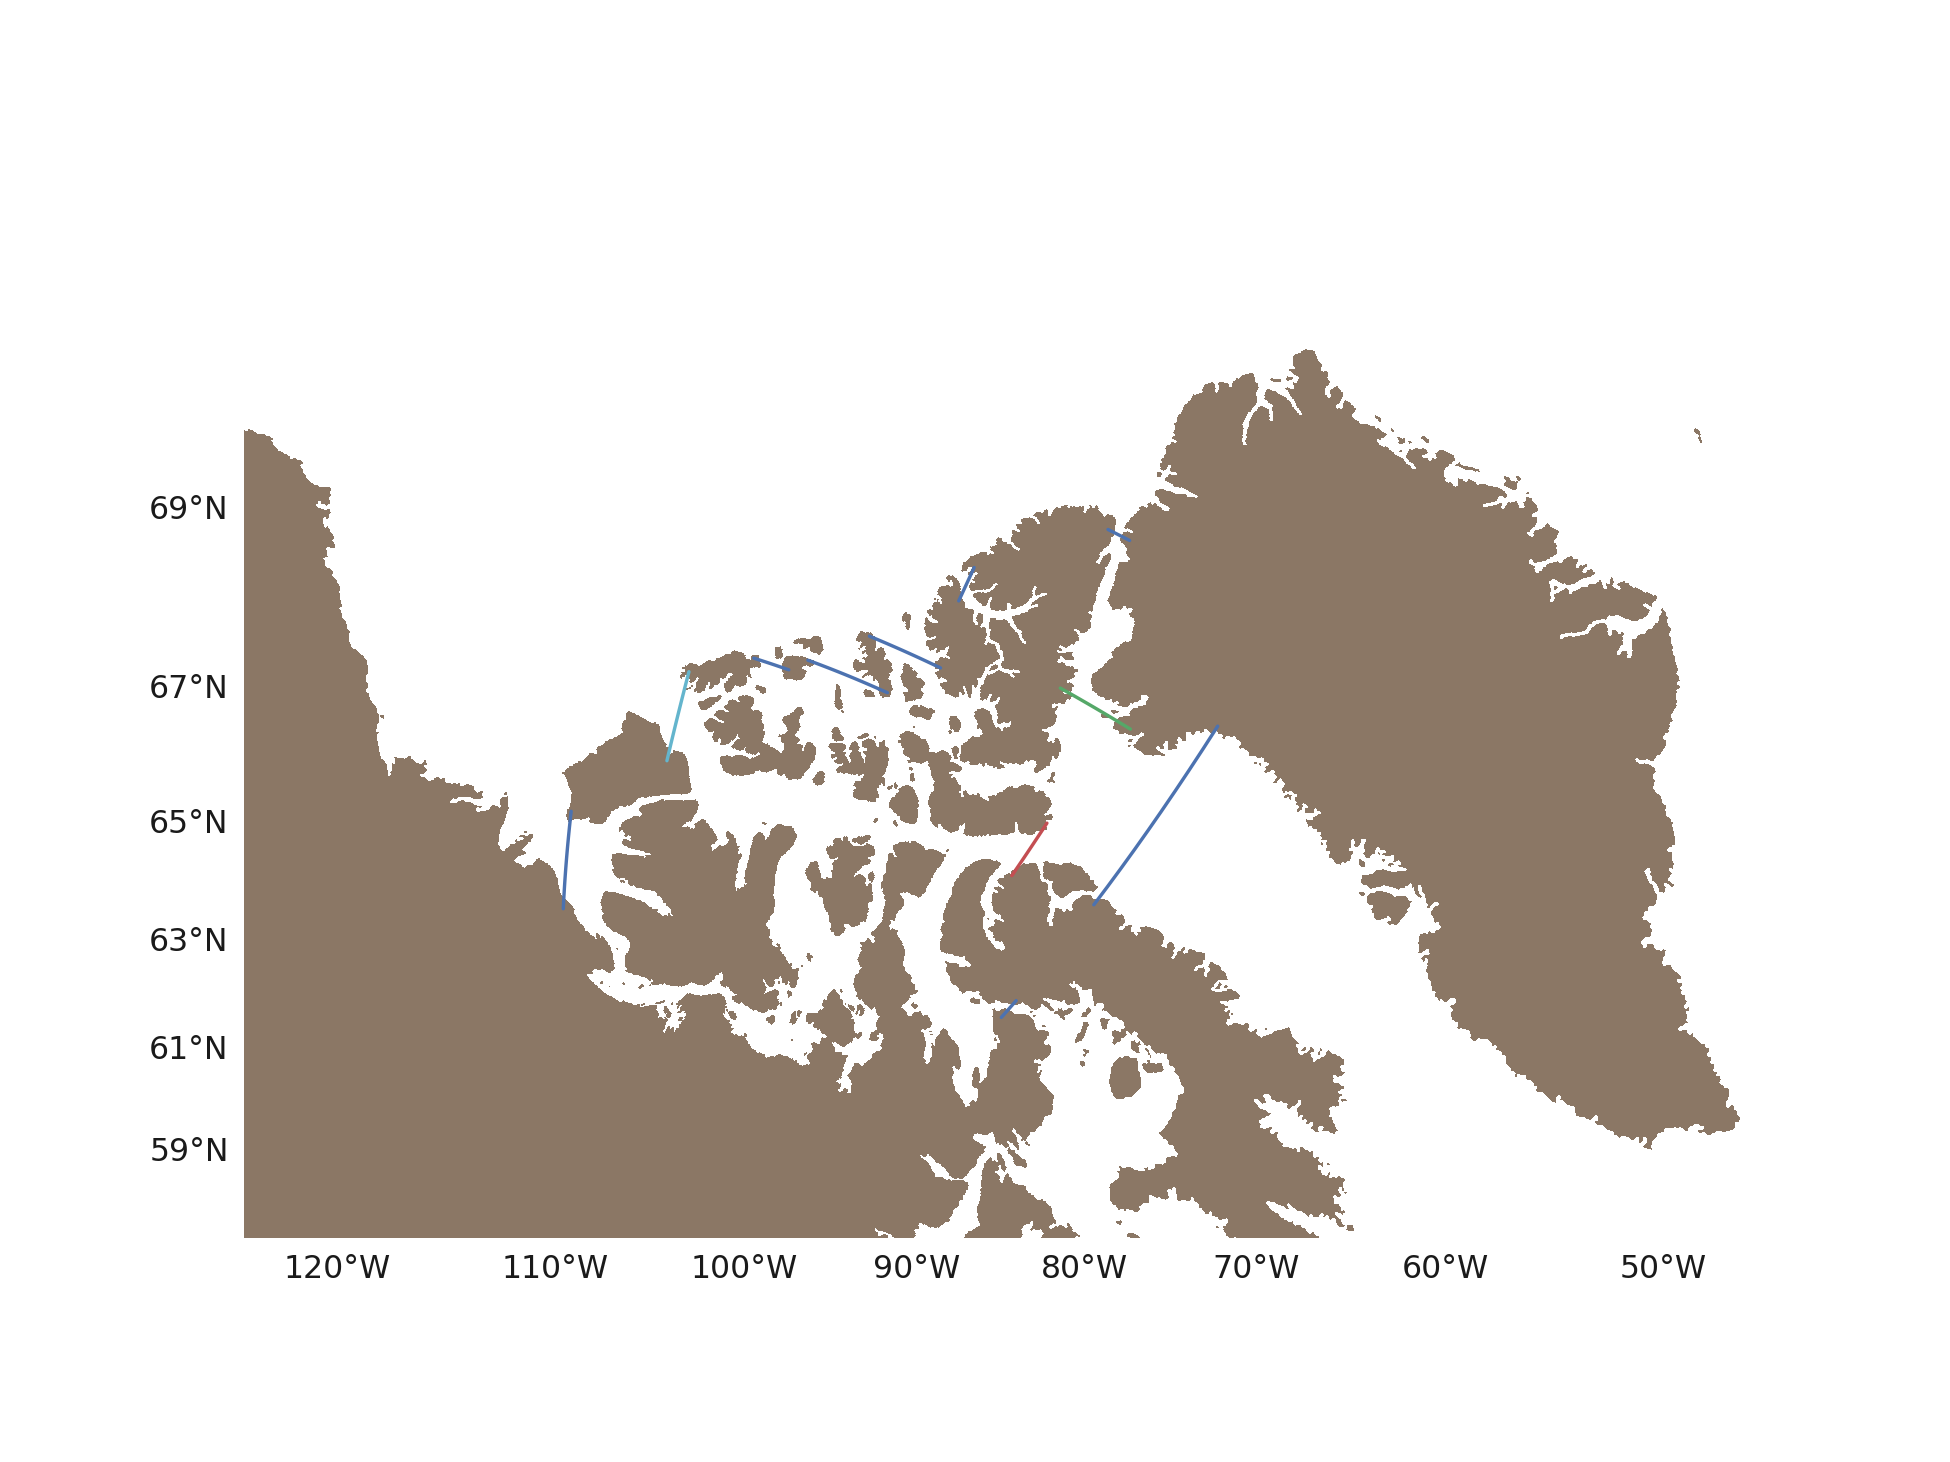

In [7]:
fig, ax1, proj1  = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x_model, y_model = proj1(lons, lats)

#left side:
proj1.plot(x_model[2013,300:392], y_model[2013,300:392], '-b')
proj1.plot(x_model[1935,450:530], y_model[1935,450:530], '-c')
proj1.plot(x_model[1850:1885,555], y_model[1850:1885,555], '-b')
proj1.plot(x_model[1753:1837,568], y_model[1753:1837,568], '-b')
proj1.plot(x_model[1720:1790,605], y_model[1720:1790,605], '-b')
proj1.plot(x_model[1730,660:690], y_model[1730,660:690], '-b')

#top:
proj1.plot(x_model[1635:1653,760], y_model[1635:1653,760], '-b')

#right:
proj1.plot(x_model[1520,505:673], y_model[1520,505:673], '-b')
proj1.plot(x_model[1520,385:405], y_model[1520,385:405], '-b')

# middle:
proj1.plot(x_model[1570:1630,635], y_model[1570:1630,635], '-g')
proj1.plot(x_model[1585,485:538], y_model[1585,485:538], '-r')